In [4]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from _collections_abc import Iterator
plt.style.use('fivethirtyeight')

# Lecture 25 #

## Review: Lecture 24
From a random sample, construct a 95% confidence interval for the ages of the mothers in the population.

In [6]:
# Random sample of mother-newborn pairs
births = pd.read_csv('baby.csv')
births.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


What is the average age of moms who are having children in the entire population?

**Parameter:** Average age of moms when they give birth to first child.

**Statistic:** Average age of moms in our sample.

In [7]:
# Average age of mothers in the sample
births['Maternal Age'].mean()

27.228279386712096

Remember there was a distribution of ages.

Text(0.5, 1.0, 'Distribution of Age in our SAMPLE')

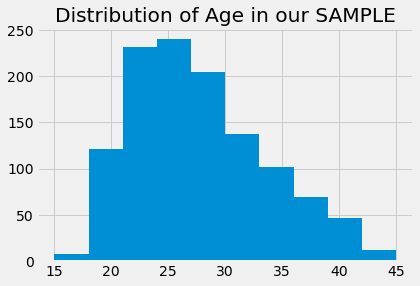

In [8]:
births.hist('Maternal Age')
plt.title("Distribution of Age in our SAMPLE")


### Compute the Sample Statistic
Since we are interested in estimating the average age of mothers in the population we will use the average age statistic:

In [9]:
def avg_maternal_age(sample):
    return sample["Maternal Age"].mean()

In [10]:
sample_statistic = avg_maternal_age(births)
sample_statistic

27.228279386712096

### Use the Bootstrap to Estimate the CI 

The interval of estimates is the "middle 95%" of the bootstrap estimates.

This is called a *95% confidence interval* for the **mean age in the population**.


In [12]:
def bootstrapper(sample, statistic, num_repetitions=10000):
    """
    Returns the statistic computed on a num_repetitions  
    bootstrap samples from sample.
    """
    bstrap_stats = np.array([])
    for i in np.arange(num_repetitions):
        # Step 1: Sample the Sample
        bootstrap_sample = sample.sample(frac=1, replace=True)
        # Step 2: compute statistics on the sample of the sample
        bootstrap_stat = statistic(bootstrap_sample)
        # Accumulate the statistics
        bstrap_stats = np.append(bstrap_stats, bootstrap_stat)

    return bstrap_stats    

In [14]:
def compute_ci(bs_samples, confidence_level):
    """
    Returns the confidence interval for the provided bootstrap samples
    and desired confidence level.
    """
    tail_size = (100 - confidence_level)/2
    lower = np.percentile(bs_samples, tail_size,)
    upper = np.percentile(bs_samples, 100 - tail_size, )
    return [lower, upper]

In [15]:
bootstrap_means = bootstrapper(births, avg_maternal_age, 10000)
avg_maternal_age_ci = compute_ci(bootstrap_means, confidence_level=95)
avg_maternal_age_ci

[26.89267461669506, 27.55792163543441]

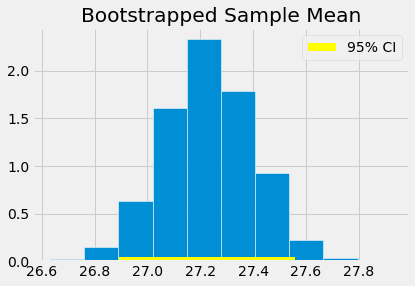

In [24]:
plt.hist(bootstrap_means, density=True, ec='white');


[left, right] = avg_maternal_age_ci
plt.plot([left, right], [0, 0], color='yellow', lw=8,label='95% CI');
plt.title("Bootstrapped Sample Mean")
plt.legend()

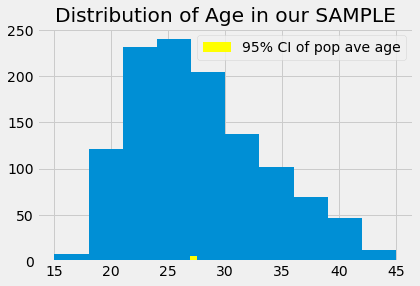

In [25]:
# Now we can visualize this interval back on our sample
# Notice tiny yellow bar at the bottom:
births.hist('Maternal Age')
plt.title("Distribution of Age in our SAMPLE")

plt.plot([left, right], [0, 0], color='yellow', lw=10,label='95% CI of pop ave age');

plt.legend()


## Method Based on CLT

In [62]:
sampled_ages = births['Maternal Age']
sample_size = len(sampled_ages)
sample_average = np.average(sampled_ages)
sample_SD = np.std(sampled_ages,ddof=1) #The parameter ddof=1 ensures that you're calculating the std for a sample, not a population

print(f"Sample Size: {sample_size}")
print(f"Sample Average: {sample_average}")
print(f"Sample SD: {sample_SD}")

Sample Size: 1174
Sample Average: 27.228279386712096
Sample SD: 5.817838716855792


## Approximating the confidence interval

We need to add $2 \cdot ( \frac{\text{Population SD}}{\sqrt{\text{Sample_Size}}})$ on one side and subtract it on the other side to get the confidence interval but we don't have the population SD.

In [29]:
# Try estimating it from the sample

estimated_SE_of_sample_average = sample_SD / (sample_size**0.5)
estimated_SE_of_sample_average

0.16979606801968558

In [30]:
# Approximate 95% confidence interval for population mean

sample_average - 2*estimated_SE_of_sample_average, sample_average + 2*estimated_SE_of_sample_average

(26.888687250672724, 27.567871522751467)

In [31]:
#Compare this to the bootstrapped results we got above:
avg_maternal_age_ci

[26.89267461669506, 27.55792163543441]









Back to Slides